# Predicting survival on the Titanic disaster
**Weld Lucas Cunha**

## Overview

Welcome to my notebook! <br/>
In this notebook, we'll apply different Machine Learning techniques to predict which passengers survived the Titanic shipwreck. <br/>
The chosen data is the "Titanic - Machine Learning from Disaster" dataset, available at https://www.kaggle.com/c/titanic.

![titanic](../imgs/titanic2-0349859403-2203948..capa_widexl.jpg)

## Importing Modules and Reading the Dataset

In [1]:
import sys, os
import copy

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# import folium
# from geopy.geocoders import Nominatim

# from sklearn import linear_model
# from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 12})
np.random.seed(42)

In [2]:
# Loading my kaggle keys
os.environ['KAGGLE_CONFIG_DIR'] = "../Kaggle/"

In [3]:
# Reading the dataset files
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# Taking a look at some data samples
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Each instance of this dataset represents one single person that was on the ship. The following features are available:

- PassengerId: Passenger ID in the ship (numerical)
- Survived: Passenger Survived or not (categorical)
- Pclass: Ticket class (categorical)
- Name: Passenger name (categorical)
- Sex: Passenger sex (categorical)
- Age: Passenger age (numerical)
- SibSp: Number of siblings/spouser aboard the ship (numerical)
- Parch: Number of parents/children aboard the ship (numerical)
- Ticket: Ticket number (categorical)
- Fare: Passenger fare (numerical)
- Cabin: Cabin number (categorical)
- Embarked: Port of Embarkation (categorical)

In [8]:
# Exploring column types and the presence of null values per column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
null_samples = {col:df_train[col].isnull().sum() for col in df_train.columns}
null_samples

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

Some null values were found at the Age, Cabin and Embarked features.

In [10]:
# Basic statistics for the numerical columns
df_description = df_train.describe().transpose()
df_description

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Exploratory Data Analysis

In [11]:
num_features = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

print('Numeric Features:', num_features)
print('Categoric Features:', cat_features)

Numeric Features: ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
Categoric Features: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


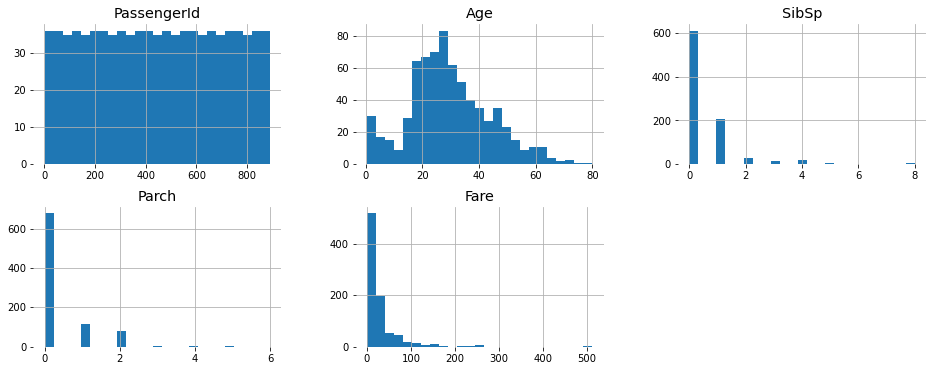

In [12]:
# Numeric Features distribution:
df_tmp = df_train[num_features]
h = df_tmp.hist(bins=25, figsize=(16, 16), xlabelsize='10', ylabelsize='10', layout=(5, 3))
sns.despine(left=True, bottom=True)

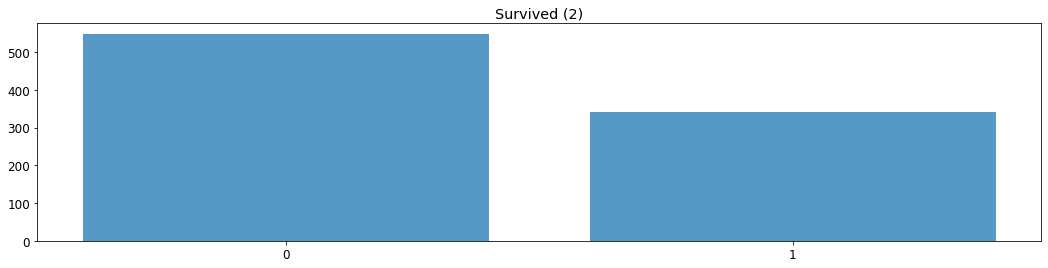

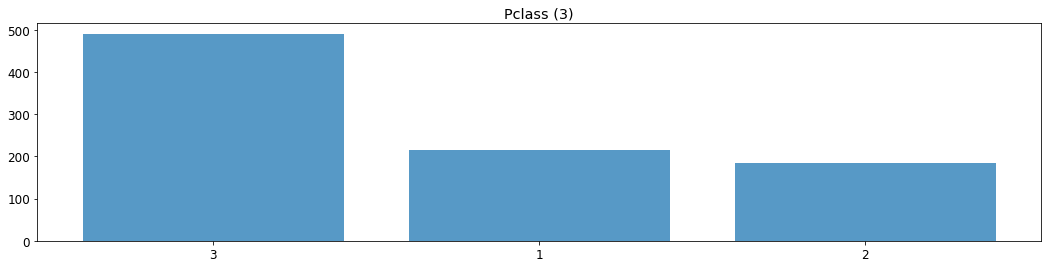

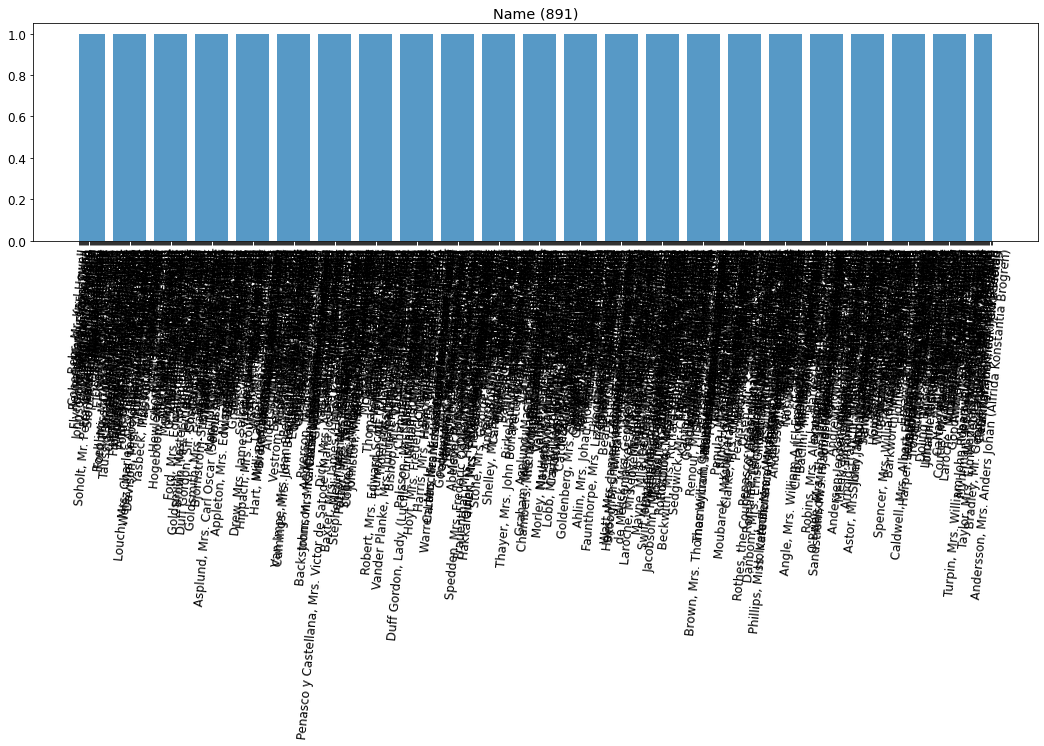

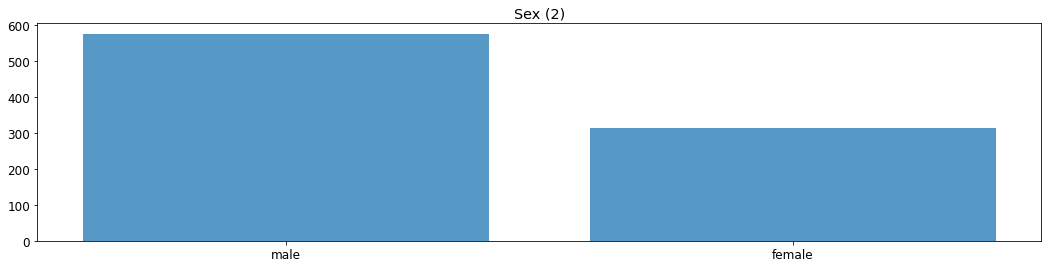

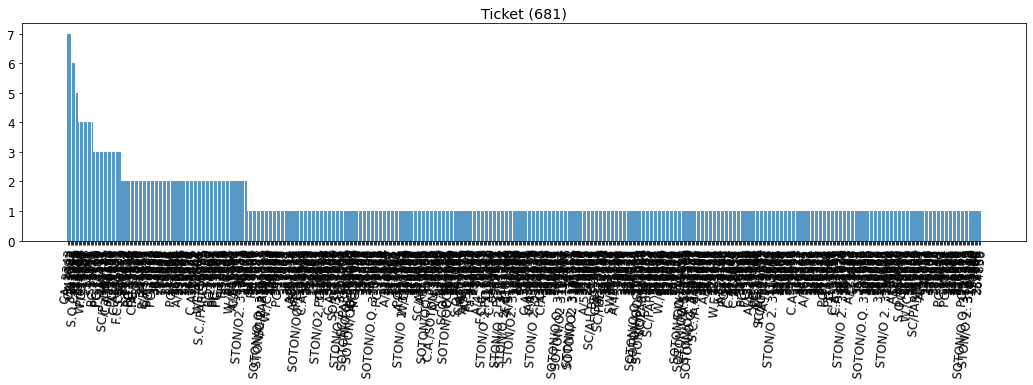

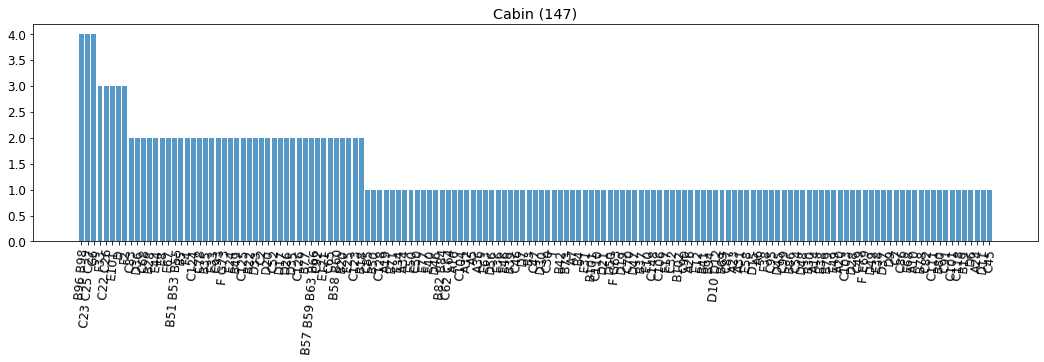

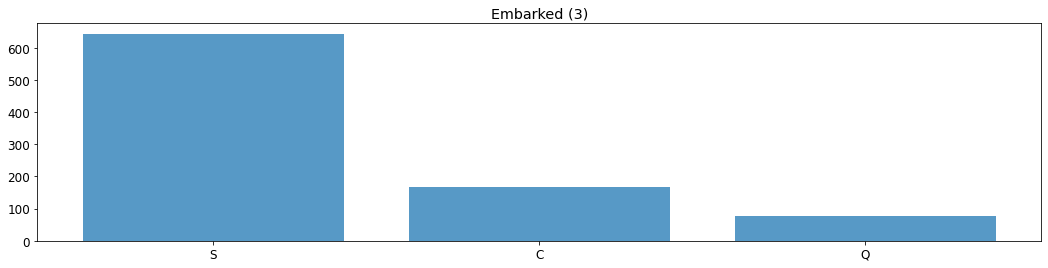

In [13]:
# Categoric features distribution
for i,feat in enumerate(cat_features):
    plt.figure(figsize=(18, 4))
    df_counts = pd.value_counts(df_train[feat])
    plt.title(f'{feat} ({df_counts.shape[0]})')
    x_ticks = np.arange(0, df_counts.shape[0], 1)
    plt.bar(x_ticks, df_counts.values, alpha=0.75)
    if df_counts.shape[0] > 5:
        plt.xticks(x_ticks, df_counts.index, rotation=85)
    else:
        plt.xticks(x_ticks, df_counts.index)
#     plt.tight_layout()
    plt.show()

We can observe that some features, such as  PassengerId and name, might not bring relevant information for our analysis, since these features represent individuals and not groups of people. <br/>
Ticket and Cabin, also, have too many "categories" and must be preprocessed in order to better contribute to our model.

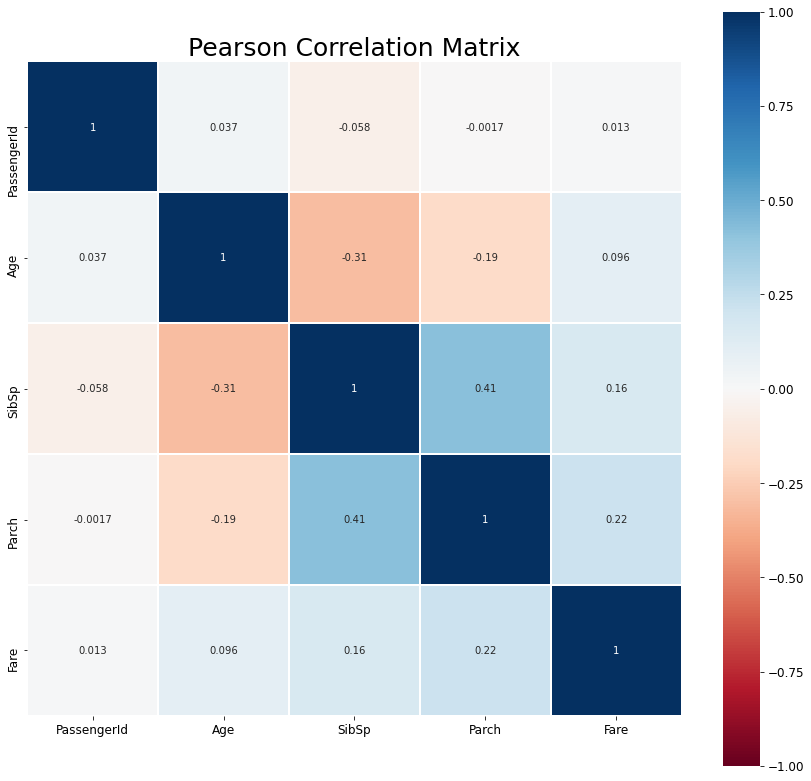

In [14]:
# Checking Out the Correlation Among Explanatory Variables
def plot_features_corr(df, figsize=(12, 12), cmap="RdBu", title='Pearson Correlation Matrix'):   
    df_corr = df.corr()
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=25)
    sns.heatmap(df_corr, linewidths=0.25, vmax=1, vmin=-1, square=True, cmap=cmap,
                linecolor='w', annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .9})
    plt.tight_layout()
    plt.show()

plot_features_corr(df_train[num_features])

As expected the PasssengerID has no correlation with any other numerical feature.
The highest correlation (in absolute value) is observed among SibSp and Parch followed by SibSp and Age.

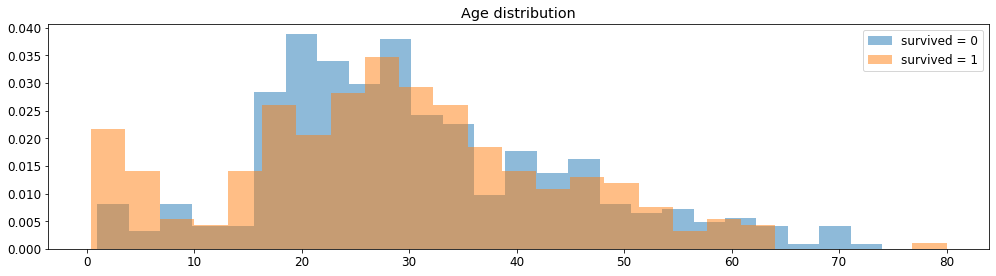

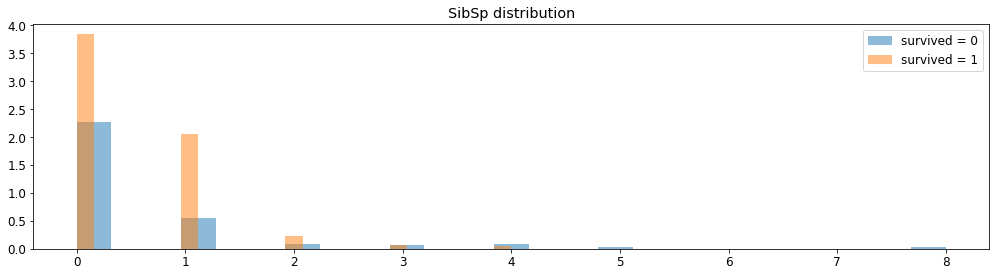

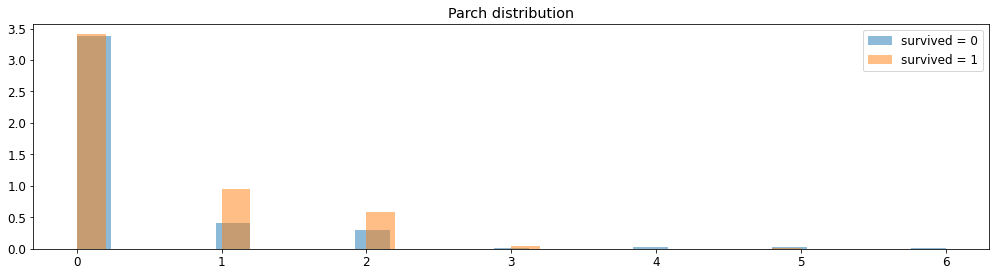

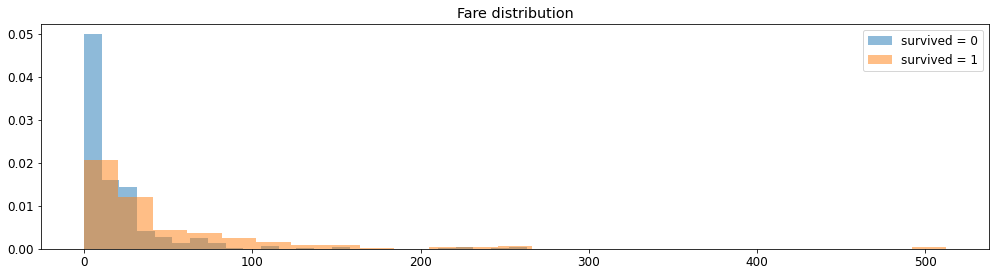

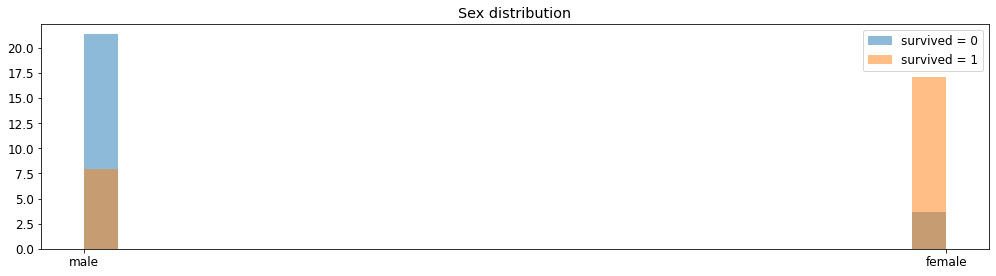

In [15]:
# Plotting some features distributions separated by survival results

selected_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex']
df_train_survive0 = df_train[df_train['Survived'] == 0]
df_train_survive1 = df_train[df_train['Survived'] == 1]

for col in selected_features:
    plt.figure(figsize=(14, 4))
    plt.title(f"{col} distribution")
    plt.hist(df_train_survive0[col], alpha=0.5, bins=25, label='survived = 0', density=True)
    plt.hist(df_train_survive1[col], alpha=0.5, bins=25, label='survived = 1', density=True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Data Preparation

In [16]:
# Useful variables:
Y_TARGET = 'Survived'

In [17]:
# Drop duplicates
df_no_duplicates = df_train.drop_duplicates()

print('Original data:', df_train.shape[0], 'samples -',
      df_train.shape[0]-df_no_duplicates.shape[0], 'duplicated samples were found.')

df_train = df_no_duplicates

Original data: 891 samples - 0 duplicated samples were found.


In [18]:
# Splitting X and y:
y_train = df_train[Y_TARGET]
X_train = df_train.drop(columns=[Y_TARGET])

X_test = df_test.drop(columns=[Y_TARGET], errors='ignore')

## Preprocessing

In [19]:
# Listing all the features by type
numeric_cols = ['Age', 'SibSp', 'Parch', 'Fare'
               ]
categoric_cols = ['Pclass', 'Sex', 'Embarked'
                 ]


print(len(numeric_cols + categoric_cols), 'features selected')

7 features selected


In all cases a SimpleImputer will be used in order to avoid any possibility of breaking the model in case a null value is found. <br/>
For the numeric columns a MinMaxScaler will be used in order to scale all the features to 0~1 range. <br/>
For the categorical columns, the OneHotEncoder will be used.

In [20]:
# Features encoding
features_encoder = ColumnTransformer([("numeric cols", Pipeline([('num imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                                                                 ('num scaling', MinMaxScaler()),
                                                                ]), numeric_cols),
                                      ("categoric cols", Pipeline([('cat imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Null')),
                                                                   ('cat one-hot encoder', OneHotEncoder(handle_unknown='ignore')),
                                                                ]), categoric_cols),
                                     ], remainder='drop')

In [21]:
# Features selection
features_selector = VarianceThreshold(threshold=0)

In [22]:
# Features creation
features_creator = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [23]:
# Pre-processing pipeline:
preprocessor_lin = Pipeline([('features encoding', copy.deepcopy(features_encoder)),
                             ('features selection', copy.deepcopy(features_selector)),
                            ])

In [24]:
# Pre-processing pipeline:
preprocessor_poly = Pipeline([('features encoding', copy.deepcopy(features_encoder)),
                              ('features creation', copy.deepcopy(features_creator)),
                              ('features selection', copy.deepcopy(features_selector)),
                             ])

Two pre-processing pipelines were created with different stages:
- 1: Features encoding + features selection (by variance threshold)
- 2: Features encoding + features selection (by variance threshold) + polynomial combination of the features (degree: 2)

In [25]:
# Encoding the data
X_train_lin = preprocessor_lin.fit_transform(X_train, y_train)
pd.DataFrame(X_train_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
888,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
X_train_poly = preprocessor_poly.fit_transform(X_train, y_train)
pd.DataFrame(X_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
888,0.346569,0.125,0.333333,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
889,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
X_test_lin = preprocessor_lin.transform(X_test)
pd.DataFrame(X_test_lin)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.428248,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.346569,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
414,0.484795,0.000,0.000000,0.212559,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
415,0.478512,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
416,0.346569,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
X_test_poly = preprocessor_poly.transform(X_test)
pd.DataFrame(X_test_poly)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.428248,0.000,0.000000,0.015282,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.585323,0.125,0.000000,0.013663,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.773813,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.334004,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.271174,0.125,0.166667,0.023984,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.346569,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.484795,0.000,0.000000,0.212559,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.478512,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.346569,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Baseline Models

Two baseline models are trained, considering two preprocessin pipelines (linear and polynomial)

In [29]:
# Baseline lin
clf_lin = SGDClassifier().fit(X_train_lin, y_train)

In [30]:
# Summaryze metrics lin:
y_pred_lin_train = clf_lin.predict(X_train_lin)
y_pred_lin_test = clf_lin.predict(X_test_lin)

train_metrics = {'Model/Stage': 'Train - Lin',
                 'accuracy_score': accuracy_score(y_train, y_pred_lin_train),
                 'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_lin_train),
                 'f1_score': f1_score(y_train, y_pred_lin_train),
                }

baseline_metrics = []
baseline_metrics.append(train_metrics)

In [31]:
print(classification_report(y_train, y_pred_lin_train))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       549
           1       0.71      0.75      0.73       342

    accuracy                           0.79       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [32]:
submission_lin = df_test[['PassengerId']]
submission_lin['Survived'] = y_pred_lin_test
submission_lin.to_csv('../submissions/submission_lin.csv', index=False)

In [33]:
# ! kaggle competitions submit -c titanic -f "../submissions/submission_lin.csv" -m "Baseline with linear features"

In [34]:
# Baseline poly
clf_poly = SGDClassifier().fit(X_train_poly, y_train)

In [35]:
# Summaryze metrics poly:
y_pred_poly_train = clf_poly.predict(X_train_poly)
y_pred_poly_test = clf_poly.predict(X_test_poly)

train_metrics = {'Model/Stage': 'Train - Poly',
                 'accuracy_score': accuracy_score(y_train, y_pred_poly_train),
                 'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_poly_train),
                 'f1_score': f1_score(y_train, y_pred_poly_train),
                }

baseline_metrics.append(train_metrics)

In [36]:
print(classification_report(y_train, y_pred_poly_train))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       549
           1       0.87      0.59      0.70       342

    accuracy                           0.81       891
   macro avg       0.83      0.77      0.78       891
weighted avg       0.82      0.81      0.80       891



In [37]:
submission_poly = df_test[['PassengerId']]
submission_poly['Survived'] = y_pred_poly_test
submission_poly.to_csv('../submissions/submission_poly.csv', index=False)

In [38]:
# ! kaggle competitions submit -c titanic -f "../submissions/submission_poly.csv" -m "Baseline with polynomial features"

In [39]:
# Baseline metrics
baseline_metrics = pd.DataFrame(baseline_metrics)
baseline_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - Lin,0.786756,0.780654,0.730878
1,Train - Poly,0.808081,0.766537,0.701571


Kaggle baseline submissions <br/>
![kaggle baseline](../imgs/kaggle_submissions_baseline.png)

Two baselines were created (with and without adding polynomial combination of features). <br/>
The creation of new features by polynomial combination significantly improved the performance, while considering the same ML technique (linear model).

Since the model with the polynomial features presented best results in the test, the data with polynomial features was selected for the next stage.

## Enhanced Models Training and Validation

In this stage, some advanced models will be trained considering the polynomial features:
- Random Forest Classifier
- Logistic Regression Classifier
- KNN Classifier
- MLP Classifier

In [40]:
# Training settings:
n_jobs = 4
n_iter = 100
cv = 5
scoring = 'balanced_accuracy'

X_train_ = X_train_poly
y_train_ = y_train
X_test_ = X_test_poly

In [41]:
# RandomForest:
param_grid = {'n_estimators': [1, 5, 10, 50, 100],
              'criterion': ["gini", "entropy"],
              'max_depth': [3, 5, 10, 20],
              'max_features': [3, 5, 8, 10, "auto", "sqrt", "log2"],
             }

rf_clf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
rf_clf.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'max_features': [3, 5, 8, 10, 'auto',
                                                         'sqrt', 'log2'],
                                        'n_estimators': [1, 5, 10, 50, 100]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [42]:
# LogisticRegression:
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5],
              'C': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             }

logreg_clf = RandomizedSearchCV(LogisticRegression(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
logreg_clf.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=4,
                   param_distributions={'C': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.1, 0.01, 0.001, 0.0001,
                                                1e-05]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [43]:
# KNeighbors:
param_grid = {'n_neighbors': [1, 3, 5, 10],
              'weights': ["uniform", "distance"],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [3, 5, 8, 10, 20, 30, 40],
             }

knn_clf = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
knn_clf.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [3, 5, 8, 10, 20, 30, 40],
                                        'n_neighbors': [1, 3, 5, 10],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [44]:
# MLP:
param_grid = {'hidden_layer_sizes': [4, 8, 16, 32, 64],
              'activation': ['identity', 'logistic', 'tanh'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
              'learning_rate': ['constant', 'invscaling', 'adaptive'],
             }

mlp_clf = RandomizedSearchCV(MLPClassifier(), param_distributions=param_grid, n_iter=n_iter, cv=cv,
                             scoring=scoring, n_jobs=n_jobs, verbose=1, random_state=42)
mlp_clf.fit(X_train_, y_train_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100, n_jobs=4,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh'],
                                        'alpha': [1e-05, 0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [4, 8, 16, 32,
                                                               64],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In the sequence, the performance of all the hyperparameters combinations is summaryzed:

In [45]:
def plot_estimators_cvperf(estimators_list, figsize=(12, 6), error_metric=''):
    data = [pd.DataFrame(estimator.cv_results_)['mean_test_score'].dropna().values for estimator in estimators_list]
    estimator_names = [str(estimator.estimator).replace('()', '') for estimator in estimators_list]
        
    plt.figure(figsize=figsize)
    plt.title('Model(s) CV performance')
    plt.boxplot(data)
    plt.xticks([i+1 for i in range(len(estimator_names))], estimator_names)
    plt.xlabel('model techniques')
    plt.ylabel(error_metric)
    plt.tight_layout()
    plt.show()

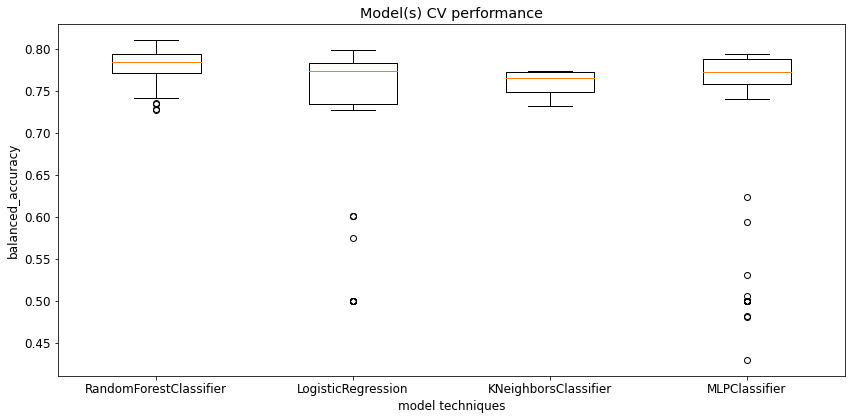

In [46]:
estimators_list = [rf_clf, logreg_clf, knn_clf, mlp_clf]
plot_estimators_cvperf(estimators_list, error_metric=scoring)

This is an important graph, each box represents the performance of all the hyperparameters combinations of one technique.
In the y axis, we show the values of the error metric used for comparison between all cross-validation values.
With this plot we can analyse which technique had the best performance by:
- Considering which technique had the highest performance of all
- Also, we can compare the erros distribution for each technique.

The main classification metrics are shown bellow, for the best estimator of each technique.

In [47]:
def get_model_metrics(estimators_list, estimator_names, X_train, y_train, stage='Train'):
    model_metrics = []
    for est,est_name in zip(estimators_list, estimator_names):
        y_pred_poly_train = est.predict(X_train)

        train_metrics = {'Model/Stage': f"{stage} - {est_name}",
                         'accuracy_score': accuracy_score(y_train, y_pred_poly_train),
                         'balanced_accuracy_score': balanced_accuracy_score(y_train, y_pred_poly_train),
                         'f1_score': f1_score(y_train, y_pred_poly_train),
                        }
        model_metrics.append(train_metrics)
    return pd.DataFrame(model_metrics)

best_estimators = [est.best_estimator_ for est in estimators_list]
est_names = [str(est.estimator).replace('()', '') for est in estimators_list]
model_metrics = get_model_metrics(best_estimators, est_names, X_train_, y_train_)
model_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - RandomForestClassifier,0.936027,0.924935,0.913242
1,Train - LogisticRegression,0.831650,0.802200,0.754902
2,Train - KNeighborsClassifier,0.876543,0.863987,0.834337
3,Train - MLPClassifier,0.840629,0.810589,0.766447


However, the best estimator is chosen as the best mean score considering the cross-validation made by the RandomizedSearchCV. <br/>
After selecting the best hyperparameters set, the model is trained considering all the data available for training.

In [48]:
model = estimators_list[np.argmax([pd.DataFrame(m.cv_results_)['mean_test_score'].dropna().max() for m in estimators_list])].best_estimator_
model.fit(X_train_, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

## Conclusion

In [49]:
# Final model performance on the test dataset
model_metrics_final = get_model_metrics(estimators_list=[model], estimator_names=[str(model).split('(')[0]],
                                        X_train=X_train_, y_train=y_train_, stage='Train (all data)')
model_metrics_final

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train (all data) - RandomForestClassifier,0.940516,0.926925,0.918083


In [54]:
baseline_metrics

,Model/Stage,accuracy_score,balanced_accuracy_score,f1_score
0,Train - Lin,0.786756,0.780654,0.730878
1,Train - Poly,0.808081,0.766537,0.701571


The performance of the best model, in the test dataset is shown here. It's possible to see a clear evolutiom on the metrics when compared to the baseline models.

In [50]:
y_pred = model.predict(X_test_)

In [51]:
submission_final = df_test[['PassengerId']]
submission_final['Survived'] = y_pred
submission_final.to_csv('../submissions/submission_final.csv', index=False)

In [53]:
# ! kaggle competitions submit -c titanic -f "../submissions/submission_final.csv" -m "Submission with enhanced model (RandomForestClassifier)"

Predicting passengers survival on the Titanic dataset is a classic challenge in ML!
However, it's important to note that this model is not applicable to other ships, since this is a very unique situation.
Even though, the results were quite impressive, close to 100% accuracy on the training dataset.